1. Data wrangling 

In [1]:
import pandas as pd
%pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt



# Load the data
df = pd.read_csv('AusApparalSales4thQrt2020.csv')

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Inspecting the first few rows of the DataFrame
print(df.head())

# Displaying the last few rows of the DataFrame
print(df.tail())

# Providing information about the DataFrame, including data types and non-null counts
print(df.info())

# Displaying descriptive statistics of the DataFrame, such as mean, std, min, max, and so on.
print(df.describe())

# Displaying datatypes of the columns
df.dtypes

         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500
             Date        Time State     Group  Unit  Sales
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000
7556  30-Dec-2020     Evening   TAS      Kids    15  37500
7557  30-Dec-2020     Evening   TAS       Men    15  37500
7558  30-Dec-2020     Evening   TAS     Women    11  27500
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   o

Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object

In [3]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

# Count duplicate entries 
duplicate_counts = df.value_counts()
duplicates = duplicate_counts[duplicate_counts > 1]
print(duplicates)

Missing Values per Column:
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64
Series([], Name: count, dtype: int64)


<Axes: ylabel='Sales'>

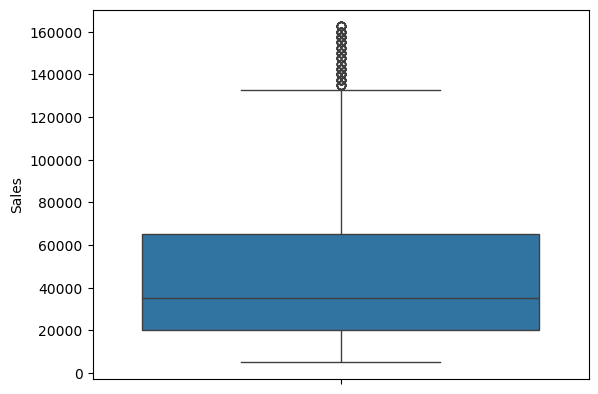

In [4]:
#Box Plot of Sales 

sns.boxplot(data=df['Sales'])

<Axes: ylabel='Unit'>

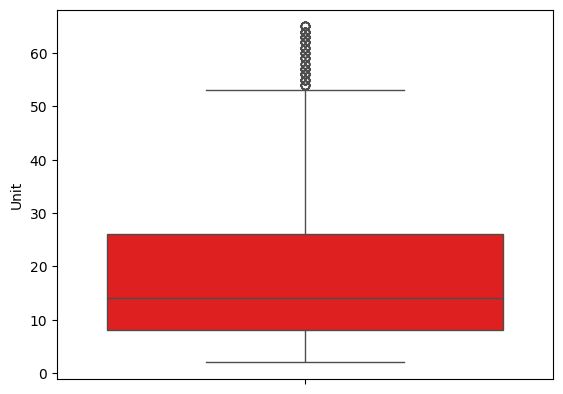

In [5]:
#Box Plot of Units

sns.boxplot(data=df['Unit'] ,color='Red')

In [6]:
# Cleaning data by standardizing formats
df['Date'] = pd.to_datetime(df['Date'])
# Displaying the DataFrame after cleaning
print("DataFrame after cleaning data by standardizing formats:")
print(df)

DataFrame after cleaning data by standardizing formats:
           Date        Time State     Group  Unit  Sales
0    2020-10-01     Morning    WA      Kids     8  20000
1    2020-10-01     Morning    WA       Men     8  20000
2    2020-10-01     Morning    WA     Women     4  10000
3    2020-10-01     Morning    WA   Seniors    15  37500
4    2020-10-01   Afternoon    WA      Kids     3   7500
...         ...         ...   ...       ...   ...    ...
7555 2020-12-30   Afternoon   TAS   Seniors    14  35000
7556 2020-12-30     Evening   TAS      Kids    15  37500
7557 2020-12-30     Evening   TAS       Men    15  37500
7558 2020-12-30     Evening   TAS     Women    11  27500
7559 2020-12-30     Evening   TAS   Seniors    13  32500

[7560 rows x 6 columns]


In [7]:
from sklearn.preprocessing import MinMaxScaler

# Scaling numeric features using min-max scaling
scaler = MinMaxScaler()
df['Sales'] = scaler.fit_transform(df[['Sales']])
print(df)

           Date        Time State     Group  Unit     Sales
0    2020-10-01     Morning    WA      Kids     8  0.095238
1    2020-10-01     Morning    WA       Men     8  0.095238
2    2020-10-01     Morning    WA     Women     4  0.031746
3    2020-10-01     Morning    WA   Seniors    15  0.206349
4    2020-10-01   Afternoon    WA      Kids     3  0.015873
...         ...         ...   ...       ...   ...       ...
7555 2020-12-30   Afternoon   TAS   Seniors    14  0.190476
7556 2020-12-30     Evening   TAS      Kids    15  0.206349
7557 2020-12-30     Evening   TAS       Men    15  0.206349
7558 2020-12-30     Evening   TAS     Women    11  0.142857
7559 2020-12-30     Evening   TAS   Seniors    13  0.174603

[7560 rows x 6 columns]


<Axes: ylabel='Sales'>

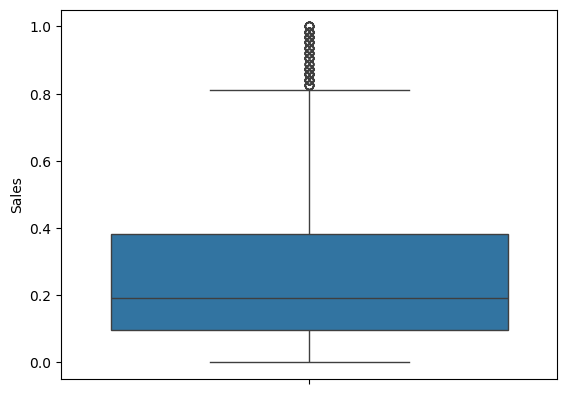

In [8]:
#Box Plot of Normalised Sales

sns.boxplot(data=df['Sales'])

In [9]:
# Grouping by Columns

print("Total sales per state")
print(df.groupby('State')['Sales'].sum().sort_values(ascending=True))

print("\n Total Sales by Age Demographic / Group ")

print(df.groupby('Group')['Sales'].sum())

print("\n Sales by demographic groups within each state")
print(df.groupby(['State', 'Group'])['Sales'].sum())

print("\n Daily sales trends")
print(df.groupby('Date')['Sales'].sum())

print("\n Time-of-day analysis (peak vs. off-peak)")
print(df.groupby(['Time'])['Sales'].sum())

Total sales per state
State
WA     106.365079
NT     109.079365
TAS    110.222222
QLD    177.888889
SA     339.412698
NSW    441.714286
VIC    635.968254
Name: Sales, dtype: float64

 Total Sales by Age Demographic / Group 
Group
Kids       480.142857
Men        484.444444
Seniors    473.571429
Women      482.492063
Name: Sales, dtype: float64

 Sales by demographic groups within each state
State  Group  
NSW    Kids       109.444444
       Men        112.206349
       Seniors    106.904762
       Women      113.158730
NT     Kids        27.619048
       Men         28.015873
       Seniors     26.126984
       Women       27.317460
QLD    Kids        45.460317
       Men         44.714286
       Seniors     43.428571
       Women       44.285714
SA     Kids        83.587302
       Men         84.476190
       Seniors     84.873016
       Women       86.476190
TAS    Kids        28.095238
       Men         27.984127
       Seniors     27.301587
       Women       26.841270
VIC    Kids

2. Data analysis 

In [10]:
print("Statistic Summary for Sales")

df['Sales'].describe() 
 # Showcase Basic Statitics for Sales

print(df['Sales'].describe())

print("\n Modal Sales")

print(df['Sales'].mode())

print("\n Median Sales")

df['Sales'].median()

Statistic Summary for Sales
count    7560.000000
mean        0.254054
std         0.204784
min         0.000000
25%         0.095238
50%         0.190476
75%         0.380952
max         1.000000
Name: Sales, dtype: float64

 Modal Sales
0    0.111111
Name: Sales, dtype: float64

 Median Sales


np.float64(0.1904761904761905)

In [11]:
from scipy.stats import skew, kurtosis

# Assuming your sales column is called 'Sales'
sales_skewness = skew(df['Sales'])
sales_kurtosis = kurtosis(df['Sales'], fisher=False)  # Set fisher=False for normal-style kurtosis

print(f"Skewness of Sales: {sales_skewness:.4f}")
print(f"Kurtosis of Sales: {sales_kurtosis:.4f}")

Skewness of Sales: 1.0853
Kurtosis of Sales: 3.6602


In [12]:
print("Statistic Summary for Units")

df['Unit'].describe() 
 # Showcase Basic Statitics for Units

print(df['Unit'].describe())

print("\n Modal Unit")

print(df['Unit'].mode())

print("\n Median Unit")

df['Unit'].median()

Statistic Summary for Units
count    7560.000000
mean       18.005423
std        12.901403
min         2.000000
25%         8.000000
50%        14.000000
75%        26.000000
max        65.000000
Name: Unit, dtype: float64

 Modal Unit
0    9
Name: Unit, dtype: int64

 Median Unit


np.float64(14.0)

In [13]:
# Grouping by Columns

print("Total sales per state")
print(df.groupby('State')['Sales'].sum().sort_values(ascending=True))

print("\n Total Sales by Age Demographic / Group ")
print(df.groupby('Group')['Sales'].sum().sort_values(ascending=True))

print("\n Sales by demographic groups within each state")
print(df.groupby(['State', 'Group'])['Sales'].sum().sort_values(ascending=True))

print("\n Daily sales trends")
print(df.groupby('Date')['Sales'].sum().sort_values(ascending=True))

print("\n Total Sales per Unit")
print(df.groupby('Unit')['Sales'].sum().sort_values(ascending=True))

print("\n Time-of-day analysis (peak vs. off-peak)")
print(df.groupby(['Time'])['Sales'].sum().sort_values(ascending=True))

Total sales per state
State
WA     106.365079
NT     109.079365
TAS    110.222222
QLD    177.888889
SA     339.412698
NSW    441.714286
VIC    635.968254
Name: Sales, dtype: float64

 Total Sales by Age Demographic / Group 
Group
Seniors    473.571429
Kids       480.142857
Women      482.492063
Men        484.444444
Name: Sales, dtype: float64

 Sales by demographic groups within each state
State  Group  
WA     Women       24.841270
NT     Seniors     26.126984
WA     Seniors     26.428571
TAS    Women       26.841270
WA     Kids        27.142857
TAS    Seniors     27.301587
NT     Women       27.317460
       Kids        27.619048
WA     Men         27.952381
TAS    Men         27.984127
NT     Men         28.015873
TAS    Kids        28.095238
QLD    Seniors     43.428571
       Women       44.285714
       Men         44.714286
       Kids        45.460317
SA     Kids        83.587302
       Men         84.476190
       Seniors     84.873016
       Women       86.476190
NSW    Seni

In [14]:
# Resampling time series data

df.set_index('Date', inplace=True)

print("Weekly Data")
weekly_data = df.select_dtypes(include='number').resample('W').sum()
print(weekly_data)

print("Monthly Data")
monthly_data = df.select_dtypes(include='number').resample('ME').sum()
print(monthly_data)

print("Quarterly Data")
quarterly_data = df.select_dtypes(include='number').resample('QE').sum()
print(quarterly_data)




Weekly Data
             Unit       Sales
Date                         
2020-10-04   6018   84.857143
2020-10-11  10801  152.777778
2020-10-18  10656  150.476190
2020-10-25  10726  151.587302
2020-11-01   8723  122.460317
2020-11-08   8346  113.809524
2020-11-15   8469  115.761905
2020-11-22   8445  115.380952
2020-11-29   8591  117.698413
2020-12-06  11849  169.412698
2020-12-13  12610  181.492063
2020-12-20  12662  182.317460
2020-12-27  12708  183.047619
2021-01-03   5517   79.571429
Monthly Data
             Unit       Sales
Date                         
2020-10-31  45716  645.650794
2020-11-30  36273  495.761905
2020-12-31  54132  779.238095
Quarterly Data
              Unit        Sales
Date                           
2020-12-31  136121  1920.650794


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, '2020-10-04'),
  Text(1, 0, '2020-10-11'),
  Text(2, 0, '2020-10-18'),
  Text(3, 0, '2020-10-25'),
  Text(4, 0, '2020-11-01'),
  Text(5, 0, '2020-11-08'),
  Text(6, 0, '2020-11-15'),
  Text(7, 0, '2020-11-22'),
  Text(8, 0, '2020-11-29'),
  Text(9, 0, '2020-12-06'),
  Text(10, 0, '2020-12-13'),
  Text(11, 0, '2020-12-20'),
  Text(12, 0, '2020-12-27'),
  Text(13, 0, '2021-01-03')])

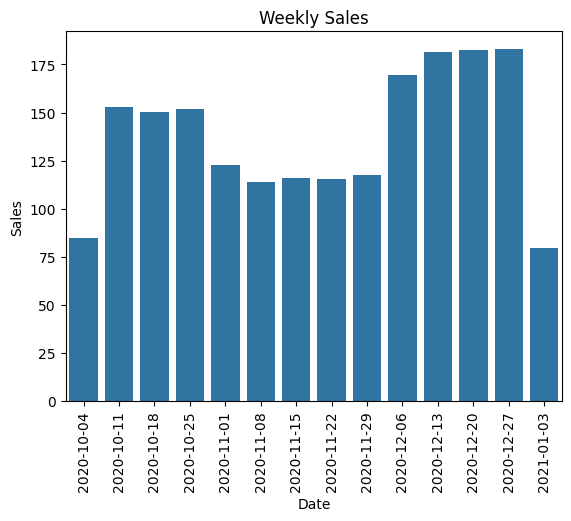

In [15]:
# Graphs of Time Series Data

#Weekly Data
sns.barplot(data=weekly_data, x='Date', y='Sales')
plt.title('Weekly Sales')
plt.xticks(rotation=90)

([0, 1, 2],
 [Text(0, 0, '2020-10-31'),
  Text(1, 0, '2020-11-30'),
  Text(2, 0, '2020-12-31')])

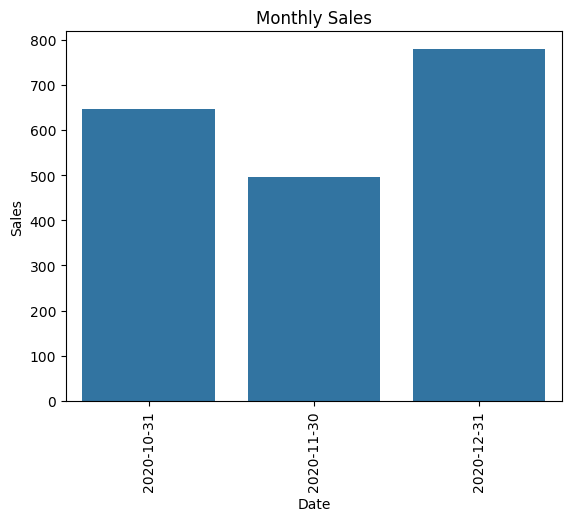

In [16]:
#Monthly Data
sns.barplot(data=monthly_data, x='Date', y='Sales')
plt.title('Monthly Sales')
plt.xticks(rotation=90)

([0], [Text(0, 0, '2020-12-31')])

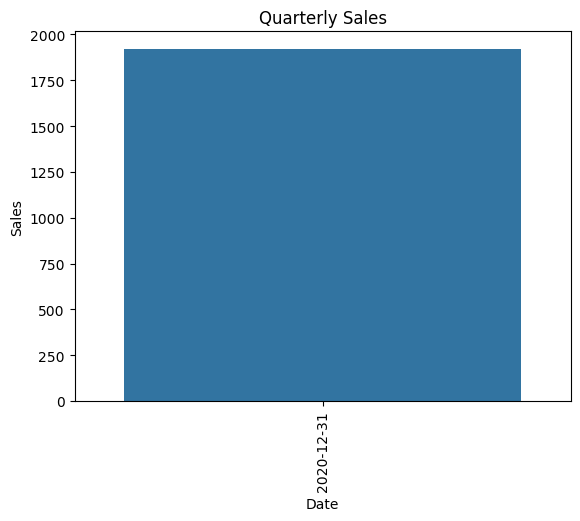

In [17]:
#Quarterly Data
sns.barplot(data=quarterly_data, x='Date', y='Sales')
plt.title('Quarterly Sales')
plt.xticks(rotation=90)

3. Data visualization 

   State     Group       Sales
0    NSW      Kids  109.444444
1    NSW       Men  112.206349
2    NSW   Seniors  106.904762
3    NSW     Women  113.158730
4     NT      Kids   27.619048
5     NT       Men   28.015873
6     NT   Seniors   26.126984
7     NT     Women   27.317460
8    QLD      Kids   45.460317
9    QLD       Men   44.714286
10   QLD   Seniors   43.428571
11   QLD     Women   44.285714
12    SA      Kids   83.587302
13    SA       Men   84.476190
14    SA   Seniors   84.873016
15    SA     Women   86.476190
16   TAS      Kids   28.095238
17   TAS       Men   27.984127
18   TAS   Seniors   27.301587
19   TAS     Women   26.841270
20   VIC      Kids  158.793651
21   VIC       Men  159.095238
22   VIC   Seniors  158.507937
23   VIC     Women  159.571429
24    WA      Kids   27.142857
25    WA       Men   27.952381
26    WA   Seniors   26.428571
27    WA     Women   24.841270


Text(0.5, 1.0, 'State-wise Sales by Demographic Group')

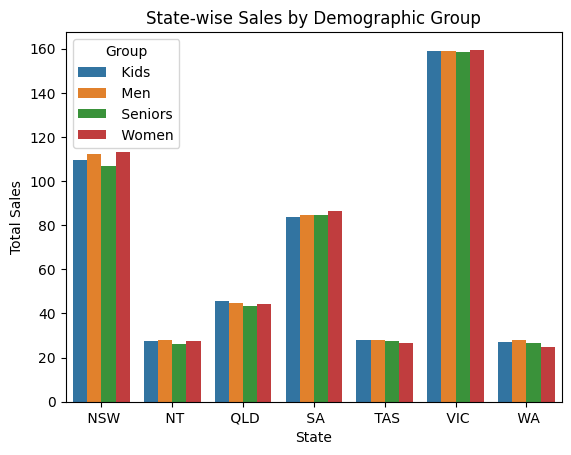

In [18]:
# State-wise sales analysis for different demographic groups

df_group_statewise=df.groupby(['State','Group'])['Sales'].sum().reset_index()
print(df_group_statewise)

sns.barplot(data=df_group_statewise, x='State', y='Sales', hue='Group')

# Customise Graphs
plt.ylabel('Total Sales')
plt.title('State-wise Sales by Demographic Group')

       Group State       Sales
0       Kids   NSW  109.444444
1       Kids    NT   27.619048
2       Kids   QLD   45.460317
3       Kids    SA   83.587302
4       Kids   TAS   28.095238
5       Kids   VIC  158.793651
6       Kids    WA   27.142857
7        Men   NSW  112.206349
8        Men    NT   28.015873
9        Men   QLD   44.714286
10       Men    SA   84.476190
11       Men   TAS   27.984127
12       Men   VIC  159.095238
13       Men    WA   27.952381
14   Seniors   NSW  106.904762
15   Seniors    NT   26.126984
16   Seniors   QLD   43.428571
17   Seniors    SA   84.873016
18   Seniors   TAS   27.301587
19   Seniors   VIC  158.507937
20   Seniors    WA   26.428571
21     Women   NSW  113.158730
22     Women    NT   27.317460
23     Women   QLD   44.285714
24     Women    SA   86.476190
25     Women   TAS   26.841270
26     Women   VIC  159.571429
27     Women    WA   24.841270


Text(0, 0.5, 'Total Sales')

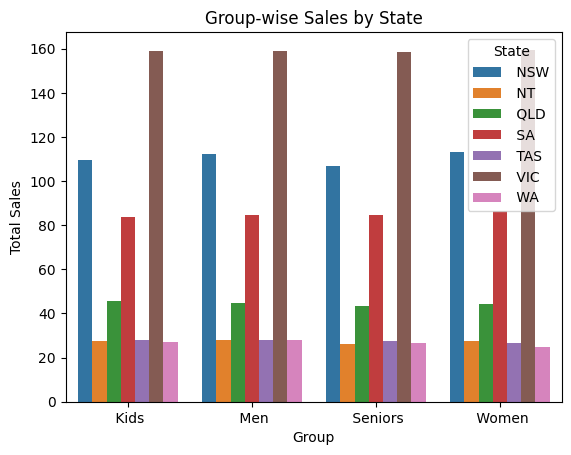

In [19]:
# Group-wise sales analysis for different states

df_group_groupwise=df.groupby(['Group','State'])['Sales'].sum().reset_index()
print(df_group_groupwise)

sns.barplot(data=df_group_groupwise, x='Group', y='Sales', hue='State')

# Customise Graphs
plt.title('Group-wise Sales by State')
plt.ylabel('Total Sales')


 Time-of-day analysis (peak vs. off-peak)
         Time       Sales
0   Afternoon  643.857143
1     Evening  631.666667
2     Morning  645.126984


<Axes: xlabel='Time', ylabel='Sales'>

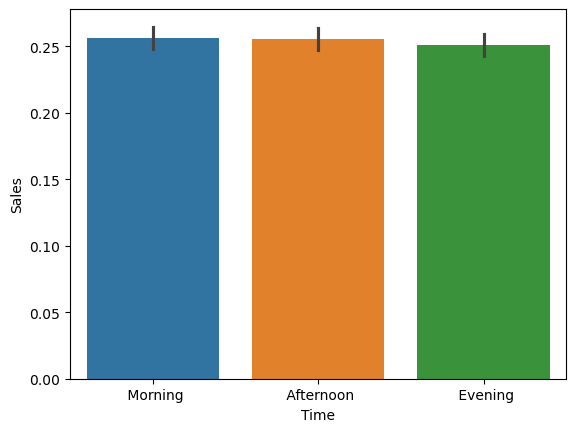

In [20]:
# Time-of-the-day analysis:

print("\n Time-of-day analysis (peak vs. off-peak)")
df_group_time=df.groupby(['Time'])['Sales'].sum().reset_index()

print(df_group_time)

sns.barplot(data=df, x='Time', y='Sales', hue='Time')



(array([ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84]),
 [Text(0, 0, '2020-10-01'),
  Text(7, 0, '2020-10-08'),
  Text(14, 0, '2020-10-15'),
  Text(21, 0, '2020-10-22'),
  Text(28, 0, '2020-10-29'),
  Text(35, 0, '2020-11-06'),
  Text(42, 0, '2020-11-13'),
  Text(49, 0, '2020-11-20'),
  Text(56, 0, '2020-11-27'),
  Text(63, 0, '2020-12-04'),
  Text(70, 0, '2020-12-11'),
  Text(77, 0, '2020-12-18'),
  Text(84, 0, '2020-12-25')])

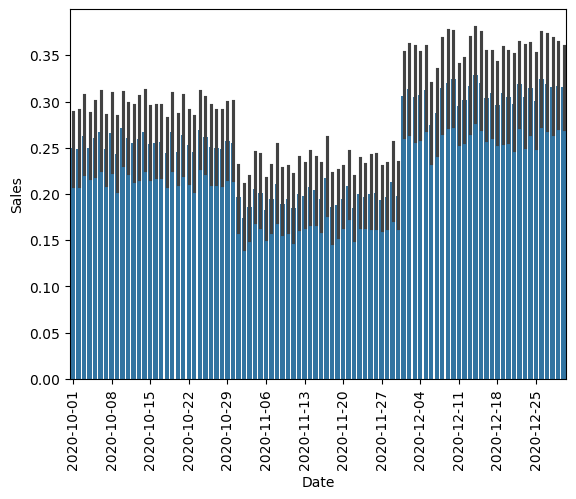

In [21]:

sns.barplot(data=df, x='Date', y='Sales')

xticks = plt.gca().get_xticks()
plt.gca().set_xticks(xticks[::7])

plt.xticks(rotation=90)